# Confidence interval (1)

This notebook covers the following cases:

1. known $\sigma$, data with normal distribution, any sample size
2. known $\sigma$, data with unknown distribution, large sample ($n \ge 30$)

## Imports and data

Required imports

In [99]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

Configure values for the problem space

In [101]:
mu = 450
sigma = 10
n = 100
LoCpc = 95

Calculate other required values

In [102]:
stdErr = sigma / math.sqrt(n)

Prepare a random sample to work with (with the given parameters)

In [103]:
sample = np.random.normal(loc=mu, scale=sigma, size=n)

## Preparation

We calculate the sample mean, $\bar{x}$.

In [104]:
xmean = stats.mstats.tmean(sample)
xmean

451.29596058045695

## Confidence interval

Now we can go through the same steps as we do manually to determine the confidence interval.


Find the cut-off points in the z-distribution. The first argument to `interval()` is the confidence as a fraction of 1.

In [105]:
zAlphaHalvedNeg, zAlphaHalvedPos = stats.norm.interval(LoCpc / 100)
print(zAlphaHalvedNeg, zAlphaHalvedPos)

-1.959963984540054 1.959963984540054


De-normalise the upper cut-off point.

In [106]:
halfIntervalWidth = zAlphaHalvedPos * stdErr
halfIntervalWidth

1.959963984540054

Print the confidence interval.

In [107]:
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}'.format(xmean, halfIntervalWidth))

Confidence interval: 451.296 ± 1.960


## Plot

Prepare the data

In [139]:
halfFigWidthInStdErr = 3
pointsPerStdErr = 20
plotXMin = xmean - halfFigWidthInStdErr * stdErr
plotXMax = xmean + halfFigWidthInStdErr * stdErr
plotYMin = 0
plotYMax = stats.norm.pdf(xmean, xmean, stdErr) * 1.2

x = np.linspace(plotXMin, plotXMax, pointsPerStdErr * halfWidthInStdErr * 2)

Plot

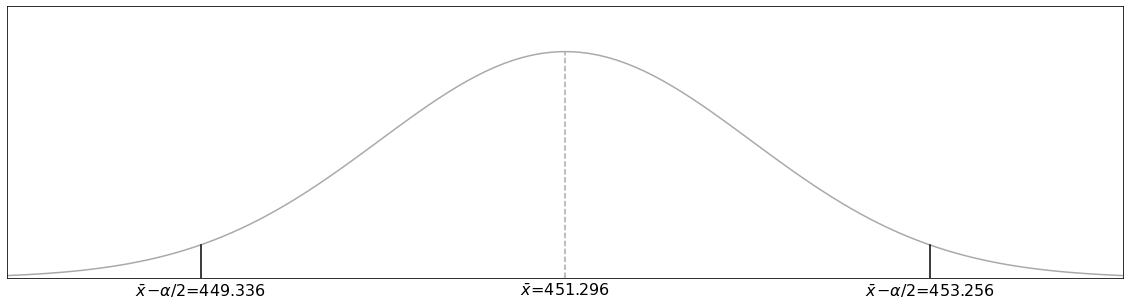

In [138]:
plt.figure(figsize=(20,5)) 
plt.xlim([plotXMin, plotXMax])
plt.tick_params(length=0)
plt.ylim([0, plotYMax])

plt.xticks([xmean - halfIntervalWidth, xmean, xmean + halfIntervalWidth], 
           [r'$\bar x\!-\!\alpha/2$={0:.3f}'.format(xmean - halfIntervalWidth), 
            r'$\bar x$={0:.3f}'.format(xmean), 
            r'$\bar x\!-\!\alpha/2$={0:.3f}'.format(xmean + halfIntervalWidth)], fontsize=16)
plt.yticks([])

plt.plot(x, stats.norm.pdf(x, xmean, stdErr), color='darkgray')
plt.plot([xmean - halfIntervalWidth, xmean - halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean + halfIntervalWidth, xmean + halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean, xmean], [0, stats.norm.pdf(xmean, xmean, stdErr)], color='darkgray', linestyle='--')
plt.show()